In [1]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import os
import warnings
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import emoji  #pip install emoji
import re
# If you set the display.max_colwidth option, the information will be displayed fully
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Data Understanding**

In [8]:
def load_data(sample=False, n =9246):
  paths = Path('/content/drive/MyDrive/task_aim/data').glob('**/*.csv')
  all_data = []
  for path in paths:
    data = pd.read_csv(path)
    if sample:
      data = data.sample(n=n)
    all_data.append(data)
  data_all = pd.concat(all_data)
  return data_all

def countplot(df, feature):
  plt.figure(figsize=(12,5))
  ax = sns.countplot(x=feature, data=df, palette='plasma', order=df[feature].value_counts().index)
  for p in ax.patches:
      x = p.get_bbox().get_points()[:, 0]
      y = p.get_bbox().get_points()[1, 1]
      #ax.annotate(''.format(y), (x.mean(), y), ha='center', va='bottom')
      ax.annotate('{}'.format(int(y)), (x.mean(), y), ha='center', va='bottom')
  ax.set(ylabel = 'Count')
  plt.savefig('out.png', bbox_inches='tight')
  plt.show()

In [9]:
data_all = load_data()
data_all

,text,dialect
0,#ناس_بكري_قالوا\n\nطيح وشوف شكون يوقف معاك غيب وشوف شكون يسأل عليك و بعد غربل و صفي...!\n#مثل_شعبي_تونسي\n#تونس_المزيانة https://t.co/RZdrOzoCUi,TN
1,@dalaaalmoufti تهبل والله .. فنانة مبدعة انت ماشاء الله 😍❤,TN
2,@MocJaber الله يبارك فيك ... يعيشك,TN
3,@dalaaalmoufti عيدكم مبروك وسنين دايمة دلوع❤,TN
4,@dalaaalmoufti الله يسلمك دلوع الغالية ويمتعك بالصحة والعافية يا اجمل قلب ❤ \nتوحشتك برشااااااااا,TN
...,...,...
40451,الله يحفظ #السعوودية واهلهاا,PL
40452,@AL_GHFRANI والله هالاشخاص من الصعب انا نلاقيهم ومن الصعب وجودهم اصلاا كلهم #نفسي #نفسي,PL
40453,@fatmanehad ع ايش شكرا حمااس,PL
40454,انا حياتي ورقة وحدة يعني لحد يغلط ويقول نفتح صفحة جديدة.,PL


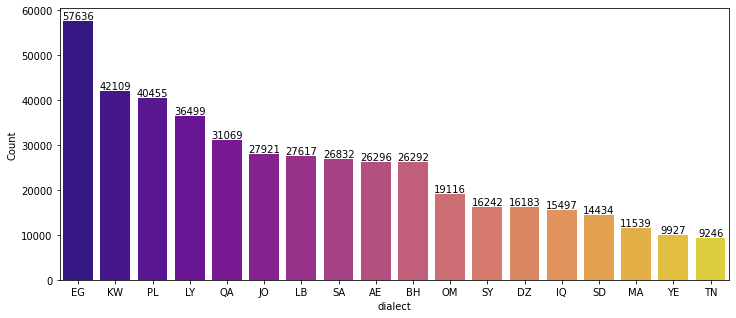

In [10]:
countplot(data_all, 'dialect')

In [12]:
#Stats about Text
def avg_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0
    return (sum(len(word) for word in words)/len(words))

def emoji_counter(sentence):
    return emoji.emoji_count(sentence)

def hyperlinks_counter(sentence):
	# findall() has been used
	# with valid conditions for urls in string
	regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
	url = re.findall(regex, sentence)
	return len(url)

data_all['word_count'] = data_all['text'].apply(lambda x: len(str(x).split(" ")))
data_all['char_count'] = data_all['text'].str.len() ## this also includes spaces
data_all['avg_char_per_word'] = data_all['text'].apply(lambda x: avg_word(x))
stop = stopwords.words('arabic')
data_all['stopwords'] = data_all['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data_all['emoji_count'] = data_all['text'].apply(lambda x: emoji_counter(x))
data_all['hyperlinks_count'] = data_all['text'].apply(lambda x: hyperlinks_counter(x))
data_all.sort_values(by='word_count',ascending=[0]).head()

,text,dialect,word_count,char_count,avg_char_per_word,stopwords,emoji_count,hyperlinks_count
27585,نبيه بري نبيه بري نبيه بري #نحو_السابعة انشالله,LB,185,224,5.000000,0,0,0
26053,٭ . . . ٭ . ٭ . . . ٭ \nالنــاس فـــﮯ وشـــگ مـرأيـــہ\nو فـــﮯ ظهـــرگ مـليـون حگـايـــہ👌😉💙 ! \n . . . ٭ . . . ٭. . . \n. .• • • •,JO,166,257,2.444444,1,3,0
7727,السلام عليكم. ادري طلبي مضحك شوي. بس تكفى تكفى اسىل متابعينك وين احصل مثل شماغ هذا يرسلي اسم المحل اوً اللوكيشن https://t.co/s9QOpA4Plg,QA,154,267,5.181818,3,0,1
2579,نفســيتك محتاجه ؟؟ \n\n 👰 📚 ✈ 🎓 \n زواج نجاح سفر تخرج \n\n 💑حب 💍خطوبة فلوس💰,JO,145,198,3.500000,0,7,0
52801,كنت دايما بسأل إزاي اخشع في الصلاه أو عالاقل مسرحش 😱 لقيت معظم الناس بتقولي اقرأي سور... https://t.co/B80Cy2tk7U,EG,140,234,5.277778,2,1,1


# **Cleaning Text**

## **Text standarisation**

In [14]:
!pip install pyarabic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 KB 12.0 MB/s eta 0:00:00


In [15]:
from textblob import TextBlob
import pyarabic.araby as araby

In [16]:
stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}

def normalizeArabic(text):
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)    # transform 'ى' to 'ي' 
    text = re.sub("ؤ", "ء", text)    # transform 'ؤ' to 'ء'
    text = re.sub("ئ", "ء", text)    # transform 'ئ' to 'ء'
    text = re.sub("ة", "ه", text)    # transform 'ة' to 'ه'
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)

def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])

## **Deal with Hashtags in a string**

In [17]:
def split_hashtag_to_words(tag):
    tag = tag.replace('#','')
    tags = tag.split('_')
    if len(tags) > 1 :
        return tags
    
    pattern = re.compile(r"[A-Z][a-z]+|\d+|[A-Z]+(?![a-z])")
    if len(pattern.findall(tag)) != 0:
        return pattern.findall(tag)
    
    # for one arabic hashtag
    return [tag]

def is_hashtag(word):
    if word.startswith("#"):
        return True
    else:
        return False
    
def extract_hashtag(text):
    hash_list = ([re.sub(r"(\W+)$", "", i) for i in text.split() if i.startswith("#")])
    word_list = []
    for word in hash_list :
        word_list.extend(split_hashtag_to_words(word))
    return word_list

def clean_hashtag(text):
    words = text.split()
    text = list()
    for word in words:
        if is_hashtag(word):
            text.extend(extract_hashtag(word))
        else:
            text.append(word)
    return " ".join(text)

## **Dealing with emojis in a string**

In [18]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text


def emoji_native_translation(text):
    text = text.lower()
    loves = ["<3", "♥",'❤']
    smilefaces = []
    sadfaces = []
    neutralfaces = []

    eyes = ["8",":","=",";"]
    nose = ["'","`","-",r"\\"]
    for e in eyes:
        for n in nose:
            for s in [")", "d", "]", "}","p"]:
                smilefaces.append(e+n+s)
                smilefaces.append(e+s)
            for s in ["(", "[", "{"]:
                sadfaces.append(e+n+s)
                sadfaces.append(e+s)
            for s in ["|", "/", r"\\"]:
                neutralfaces.append(e+n+s)
                neutralfaces.append(e+s)
            #reversed
            for s in ["(", "[", "{"]:
                smilefaces.append(s+n+e)
                smilefaces.append(s+e)
            for s in [")", "]", "}"]:
                sadfaces.append(s+n+e)
                sadfaces.append(s+e)
            for s in ["|", "/", r"\\"]:
                neutralfaces.append(s+n+e)
                neutralfaces.append(s+e)

    smilefaces = list(set(smilefaces))
    sadfaces = list(set(sadfaces))
    neutralfaces = list(set(neutralfaces))
    t = []
    for w in text.split():
        if w in loves:
            t.append("حب")
        elif w in smilefaces:
            t.append("مضحك")
        elif w in neutralfaces:
            t.append("عادي")
        elif w in sadfaces:
            t.append("محزن")
        else:
            t.append(w)
    newText = " ".join(t)
    return newText
    
def clean_emoji(text):
    text = emoji_native_translation(text)
    return text

## **Clean tweets**

In [19]:
def clean_tweet(text):
    text = re.sub('#\d+K\d+', ' ', text)  # years like 2K19
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('@[^\s]+',' ',text) # remove @username
    text = re.sub(r'\r?\n|\r',' ', text) # remove new line in  Windows: '\r\n', Linux '\n',Apple '\r'
    text = clean_hashtag(text)
    text = clean_emoji(text)
    return text

## **Cleaning Whole Text**

In [22]:
def clean_text(text):
    ## Clean for tweets
    text = clean_tweet(text)
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## Remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    ## Remove Emojis
    text = remove_emoji(text)
    ## Convert text to lowercases
    text = text.lower()
    ## Remove stop words
    text = remove_stop_words(text)
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    ## Remove Tashkeel
    text = normalizeArabic(text)
    ## Remove non-Arabic Letters
    text = re.sub('[A-Za-z]+',' ',text)
    ## Remove extra whitespace
    text = re.sub('\s+', ' ', text)
    return text

data_all['text'] = data_all['text'].apply(lambda x:clean_text(x))

In [49]:
Word_series_counts = pd.Series(' '.join(data_all['text']).split()).value_counts()
### Show Common words
freq = Word_series_counts[:30]
print(f"Most common {len(freq)} words:\n{freq.to_dict()}")
freq = list(freq.index)
### Show Rare words
All_words_dict = Word_series_counts.to_dict()
rare = dict()
c = 0
max_rare_words = 100 # to fasten the search a bit as when all used takes long period (>+30mins)
for key, value in All_words_dict.items():
    if value == 1:
        if c >= max_rare_words:
            break
        rare.update({key:value})
        c+=1

print(f"Most rare {len(rare)} words:\n{rare}")
rare = list(rare.keys())


Most common 30 words:
{'اللي': 64448, 'الله': 49578, 'مش': 30803, 'انا': 30448, 'والله': 24573, 'هه': 21205, 'شي': 19725, 'انت': 17677, 'يعني': 13822, 'الناس': 13320, 'عشان': 13314, 'الي': 12738, 'علي': 12134, 'مو': 11887, 'ده': 11128, 'شو': 9615, 'دي': 9285, 'احنا': 8511, 'ليش': 8375, 'وين': 8353, 'لازم': 7972, 'حد': 7770, 'ناس': 7363, 'ايه': 7359, 'وانا': 7020, 'مره': 6923, 'اني': 6759, 'ممكن': 6675, 'زي': 6672, 'حاجه': 6504}
Most rare 100 words:
{'وصمون': 1, 'عصاتنا': 1, 'هنتفاجا': 1, 'ونحذفه': 1, 'حلاحيل': 1, 'استلزم': 1, 'نتحقق': 1, 'مستكنين': 1, 'انكاره': 1, 'سواحليوس': 1, 'هالذكيه': 1, 'زمطت': 1, 'ياخووي': 1, 'حيغتصبوك': 1, 'نجديعسي': 1, 'ريجكم': 1, 'تبلعون': 1, 'وظله': 1, 'بنفهما': 1, 'بساقه': 1, 'اشادته': 1, 'مسرحات': 1, 'اسيءه': 1, 'تدلچ': 1, 'ثوابتك': 1, 'رحتمك': 1, 'موكليني': 1, 'بوشعر': 1, 'محتاجتني': 1, 'الاذباب': 1, 'بنصفقله': 1, 'هالشاكله': 1, 'الضماني': 1, 'وسنعه': 1, 'وللقوم': 1, 'غزتني': 1, 'اللعز': 1, 'هاخذك': 1, 'نرقوا': 1, 'اخريتو': 1, 'وجايهم': 1, 'ايدخلنا': 1, '

# **Discouver Data again after cleaning**

In [76]:

data_all['word_count'] = data_all['text'].apply(lambda x: len(str(x).split(" ")))
data_all['char_count'] = data_all['text'].str.len() ## this also includes spaces
data_all['avg_char_per_word'] = data_all['text'].apply(lambda x: avg_word(x))
stop = stopwords.words('arabic')
data_all['stopwords'] = data_all['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data_all['emoji_count'] = data_all['text'].apply(lambda x: emoji_counter(x))
data_all['hyperlinks_count'] = data_all['text'].apply(lambda x: hyperlinks_counter(x))


In [77]:
data_all.head()

,text,dialect,word_count,char_count,avg_char_per_word,stopwords,emoji_count,hyperlinks_count
0,ناس بكري قالوا طيح وشوف شكون يوقف معاك غيب وشوف شكون يسال غربل صفي شعبي تونسي تونس المزيانه,TN,18,91,4.111111,0,0,0
1,تهبل والله فنانه مبدعه انت ماشاء الله,TN,7,37,4.428571,0,0,0
2,الله يبارك فيك يعيشك,TN,4,20,4.250000,0,0,0
3,عيدكم مبروك وسنين دايمه دلوع,TN,5,28,4.800000,0,0,0
4,الله يسلمك دلوع الغاليه ويمتعك بالصحه والعافيه اجمل قلب حب توحشتك برشاا,TN,12,71,5.000000,0,0,0


# **Save cleaned dataframe to csv file**

In [78]:

df = data_all[['dialect', 'text']]
df.to_csv('/content/drive/MyDrive/CIT_DL_project/downloaded_dataset/dialect_dataset_cleaned.csv',index=False)